In [1]:
#P Praneeth Reddy
#BL.EN.U4CSE21142

In [2]:
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

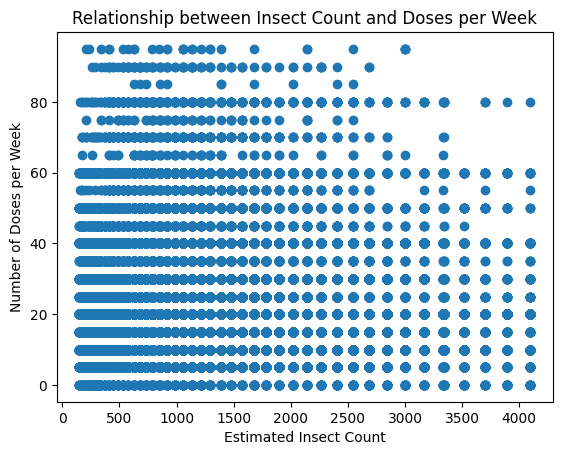

In [18]:
#A1
insect_count = df["Estimated_Insects_Count"]
doses_week = df["Number_Doses_Week"]
plt.scatter(insect_count, doses_week)
plt.xlabel("Estimated Insect Count")
plt.ylabel("Number of Doses per Week")
plt.title("Relationship between Insect Count and Doses per Week")
plt.show()

Mean Squared Error: 239.3975666358618


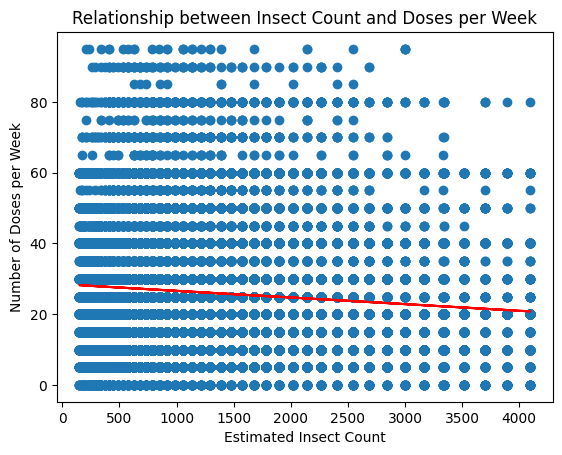

In [19]:
#A2
insect_count = df["Estimated_Insects_Count"]
doses_week = df["Number_Doses_Week"]
X = insect_count.values.reshape(-1, 1)
y = doses_week.values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.xlabel("Estimated Insect Count")
plt.ylabel("Number of Doses per Week")
plt.title("Relationship between Insect Count and Doses per Week")
plt.show()

#A3
#Coefficients:
 These are the parameters of the linear predictor function, which represent the change in the dependent variable. In simple linear regression, there is only one coefficient. In multiple linear regression, there are multiple coefficients.

#Intercept:
This is a parameter that represents the y-intercept of the linear predictor function. It represents the value of the dependent variable when all the explanatory variables are zero

#Error term:
 This is an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and the explanatory variables.

#Sum of squared errors:
 This is a measure of minimization used to estimate the regression coefficients.

#Inference:
 After fitting a linear model, statistical inference can be used to make predictions about the population parameters, such as the coefficients and the error term. This may involve hypothesis testing or confidence interval estimation


In [20]:
#A4
x = df[['Estimated_Insects_Count', 'Number_Doses_Week']]
y = df['Crop_Damage']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42).fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Coefficients:', clf.coef_)
print('Intercept:', clf.intercept_)

Accuracy: 0.83293945532298
Coefficients: [[-0.00040432  0.00078886]
 [ 0.00024321 -0.0035744 ]
 [ 0.00016111  0.00278554]]
Intercept: [ 2.36161255 -0.33880574 -2.02280681]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Squared Error (Decision Tree): 238.32366263535985
Mean Squared Error (k-NN Regressor): 282.61878235426514


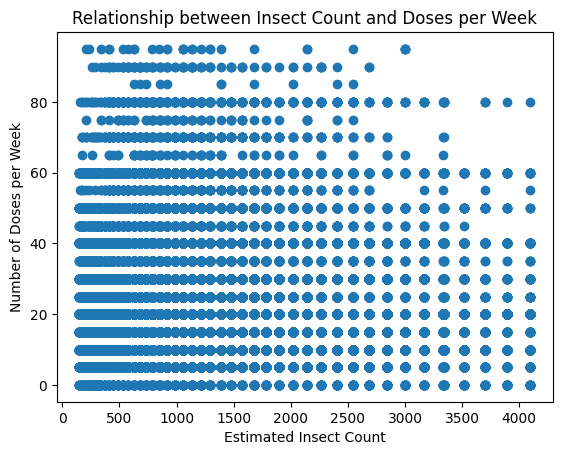

In [21]:
#A5
insect_count = df["Estimated_Insects_Count"]
doses_week = df["Number_Doses_Week"]
plt.scatter(insect_count, doses_week)
plt.xlabel("Estimated Insect Count")
plt.ylabel("Number of Doses per Week")
plt.title("Relationship between Insect Count and Doses per Week")
X = insect_count.values.reshape(-1, 1)
y = doses_week.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_tree = DecisionTreeRegressor()
regression_tree.fit(X_train, y_train)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred_tree = regression_tree.predict(X_test)
y_pred_knn = knn_regressor.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (Decision Tree):", mse_tree)
print("Mean Squared Error (k-NN Regressor):", mse_knn)
plt.show()